In [64]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Text Libraries
import nltk
import string
import re

# Feature Extraction Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

# Classifier Model libraries
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
# from sklearn.pipeline import Pipeline

# Performance Matrix libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# other
import warnings
warnings.filterwarnings("ignore")

In [65]:
df = pd.read_csv('text_emotions.csv')
df

,content,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness
19996,i constantly worry about their fight against n...,joy
19997,i feel its important to share this info for th...,joy
19998,i truly feel that if you are passionate enough...,joy


In [66]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)
Y = df['sentiment']

Dataset size: (20000, 2)
Columns are: Index(['content', 'sentiment'], dtype='object')


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    20000 non-null  object
 1   sentiment  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


<Axes: xlabel='sentiment', ylabel='count'>

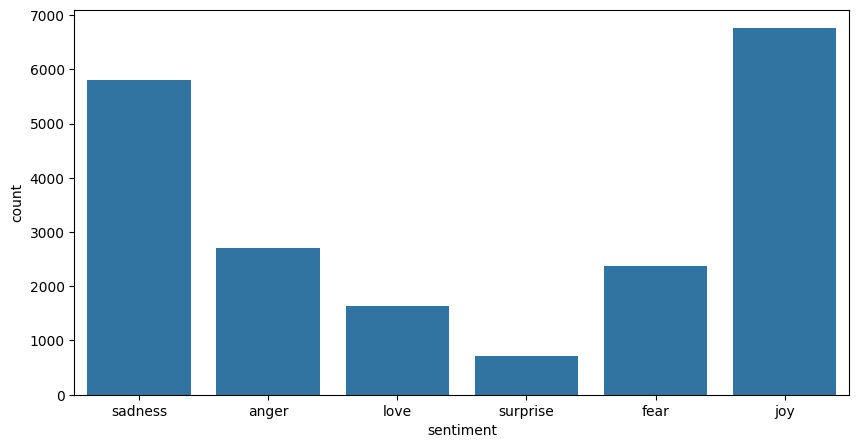

In [68]:
sns.countplot(x = 'sentiment', data = df)

In [69]:
emojis = pd.read_csv('emojis.txt',sep=',',header=None)
emojis_dict = {i:j for i,j in zip(emojis[0],emojis[1])}
pattern = '|'.join(sorted(re.escape(k) for k in emojis_dict))

def replace_emojis(text):
    text = re.sub(pattern,lambda m: emojis_dict.get(m.group(0)), text, flags=re.IGNORECASE)
    return text

def remove_punct(text):
    text = replace_emojis(text)
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['content'].apply(lambda x: remove_punct(x))
df.head(10)

,content,sentiment,Tweet_punct
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...
9,i feel romantic too,love,i feel romantic too


In [70]:
def tokenization(text):
    text = text.lower()
    text = re.split('\W+', text)

    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head(10)

,content,sentiment,Tweet_punct,Tweet_tokenized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late..."
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te..."
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]"


In [71]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
              'treatment', 'associated', 'patients', 'may','day', 'case','old','u','n','didnt','ive','ate','feel','keep'
                ,'brother','dad','basic','im'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late...","[feeling, little, burdened, lately, wasnt, sure]"
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,...","[taking, milligrams, times, recommended, amoun..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te...","[confused, life, teenager, jaded]"
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,...","[petronas, years, petronas, performed, well, m..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]",[romantic]


In [73]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated],[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feeling, grouchy]"


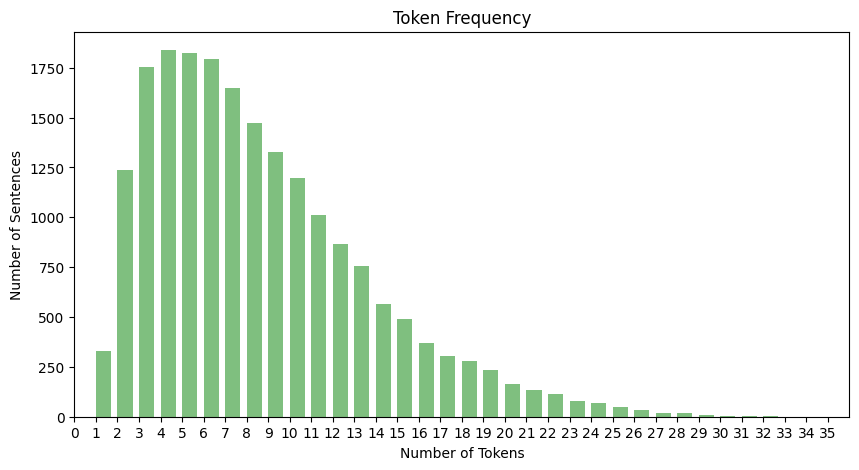

In [74]:
token_lengths = [len(t) for t in df['Tweet_lemmatized']]
plt.hist(token_lengths,bins=33,width = 0.7, fc="green",alpha=0.5)
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Sentences')
plt.title('Token Frequency')
x_Values = [i for i in range(36)]
plt.xticks(x_Values)
plt.xlim(0,36)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [75]:
def clean_text(text):
    text = remove_punct(text)
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

Vocabulary:  {'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
Encoded Document is:
[[1 1 0 2 0 1 1]
 [0 0 1 1 1 1 0]]
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


<Axes: >

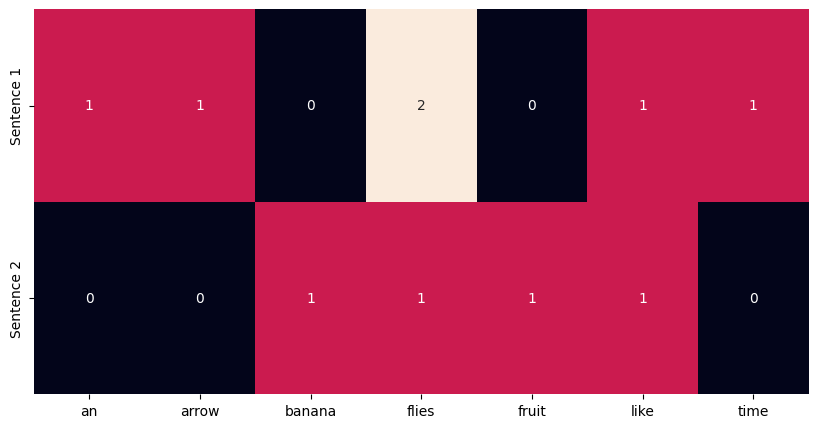

In [76]:
document = ["Time flies flies like an arrow",
            "Fruit flies like a banana"]

# Create a Vectorizer Object
vectorizer = CountVectorizer()

vectorizer.fit(document)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
vector = vectorizer.transform(document)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

dictionary = sorted(vectorizer.vocabulary_)

print(dictionary)

sns.heatmap(vector.toarray(), annot=True, cbar=False, xticklabels=dictionary,
                                             yticklabels=['Sentence 1','Sentence 2'])

[[0.42519636 0.42519636 0.         0.60506143 0.         0.30253071
  0.42519636]
 [0.         0.         0.57615236 0.40993715 0.57615236 0.40993715
  0.        ]]
{'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


<Axes: >

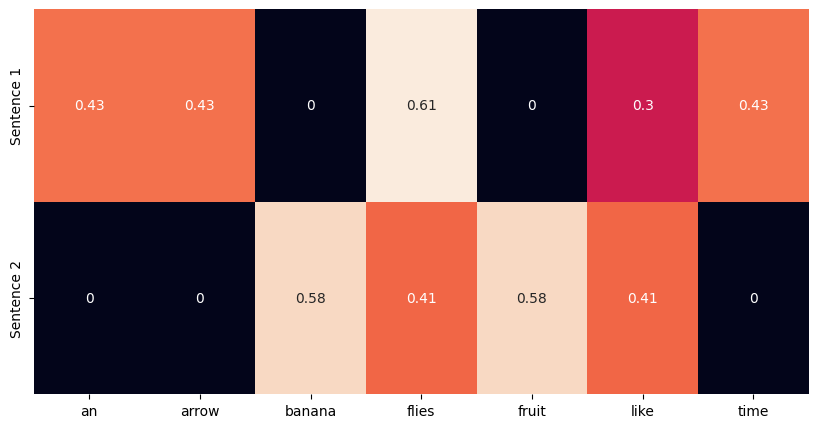

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

document = ['Time flies flies like an arrow.',
          'Fruit flies like a banana.']

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(document).toarray()

print (tfidf)

print (tfidf_vectorizer.vocabulary_)

dictionary = sorted(tfidf_vectorizer.vocabulary_)

print(dictionary)

sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=dictionary,
                                           yticklabels=['Sentence 1','Sentence 2'])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'],test_size=0.3, random_state = 0)

In [79]:
countVectorizer1 = CountVectorizer(analyzer=clean_text)
countVector1 = countVectorizer1.fit_transform(X_train)

countVector2 = countVectorizer1.transform(X_test)

tfidf_transformer_xtrain = TfidfTransformer()
x_train = tfidf_transformer_xtrain.fit_transform(countVector1)

tfidf_transformer_xtest = TfidfTransformer()
x_test = tfidf_transformer_xtest.fit_transform(countVector2)

In [80]:
svm = SGDClassifier()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_test, y_pred, average='macro')
svm_recal = recall_score(y_test, y_pred, average='macro')
svm_cm = confusion_matrix(y_test,y_pred)
svm_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(svm_acc*100))
print('Precision:', '{0:.3f}'.format(svm_prec*100))
print('Recall:', '{0:.3f}'.format(svm_recal*100))
print('F1-score:', '{0:.3f}'.format(svm_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 89.467
Precision: 88.494
Recall: 83.455
F1-score: 85.651
              precision    recall  f1-score   support

       anger       0.90      0.86      0.88       828
        fear       0.88      0.85      0.86       741
         joy       0.89      0.94      0.92      2019
        love       0.84      0.75      0.79       484
     sadness       0.92      0.94      0.93      1715
    surprise       0.88      0.66      0.75       213

    accuracy                           0.89      6000
   macro avg       0.88      0.83      0.86      6000
weighted avg       0.89      0.89      0.89      6000



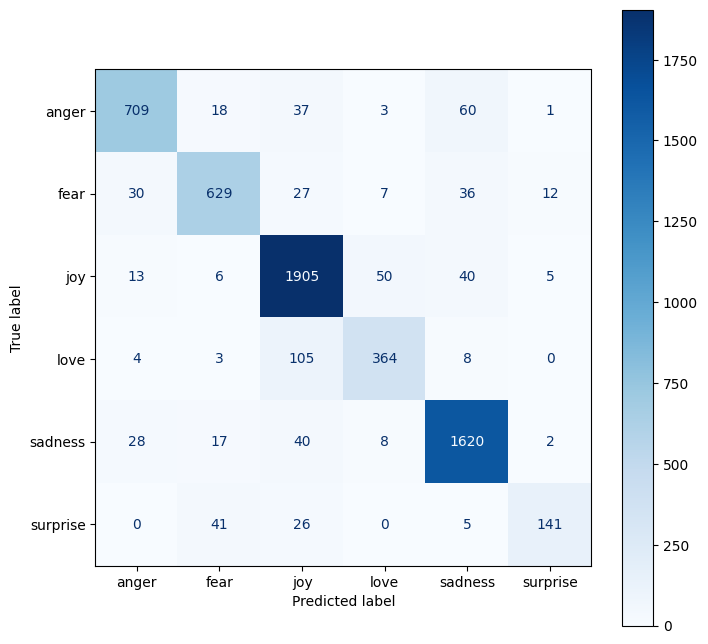

In [81]:
cm_display_svm = ConfusionMatrixDisplay(svm_cm, display_labels=svm.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_svm.plot(ax=ax,cmap='Blues')

In [82]:
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

y_pred = logisticRegr.predict(x_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_test, y_pred, average='macro')
lr_recal = recall_score(y_test, y_pred, average='macro')
lr_cm = confusion_matrix(y_test,y_pred)
lr_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(lr_acc*100))
print('Precision:', '{0:.3f}'.format(lr_prec*100))
print('Recall:', '{0:.3f}'.format(lr_recal*100))
print('F1-score:', '{0:.3f}'.format(lr_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 86.200
Precision: 87.959
Recall: 76.543
F1-score: 80.762
              precision    recall  f1-score   support

       anger       0.91      0.78      0.84       828
        fear       0.87      0.77      0.82       741
         joy       0.82      0.95      0.88      2019
        love       0.87      0.64      0.73       484
     sadness       0.88      0.94      0.91      1715
    surprise       0.92      0.52      0.66       213

    accuracy                           0.86      6000
   macro avg       0.88      0.77      0.81      6000
weighted avg       0.87      0.86      0.86      6000



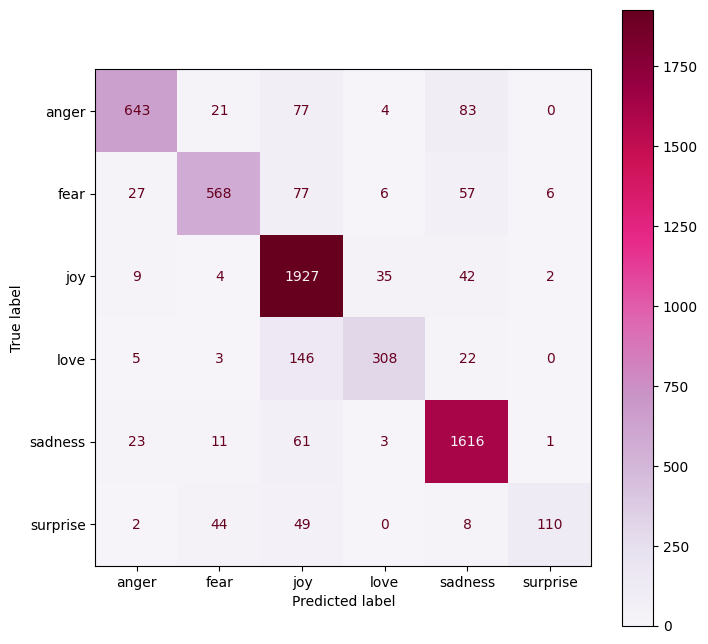

In [83]:
cm_display_lr = ConfusionMatrixDisplay(lr_cm, display_labels=logisticRegr.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_lr.plot(ax=ax,cmap='PuRd')

In [84]:
rfc = RandomForestClassifier(n_estimators=1, random_state=0)

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

rfc_acc = accuracy_score(y_pred, y_test)
rfc_prec = precision_score(y_test, y_pred, average='macro')
rfc_recal = recall_score(y_test, y_pred, average='macro')
rfc_cm = confusion_matrix(y_test,y_pred)
rfc_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(rfc_acc*100))
print('Precision:', '{0:.3f}'.format(rfc_prec*100))
print('Recall:', '{0:.3f}'.format(rfc_recal*100))
print('F1-score:', '{0:.3f}'.format(rfc_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 73.533
Precision: 71.713
Recall: 67.389
F1-score: 69.107
              precision    recall  f1-score   support

       anger       0.69      0.70      0.69       828
        fear       0.74      0.74      0.74       741
         joy       0.76      0.78      0.77      2019
        love       0.73      0.52      0.60       484
     sadness       0.74      0.79      0.76      1715
    surprise       0.65      0.52      0.58       213

    accuracy                           0.74      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.73      0.74      0.73      6000



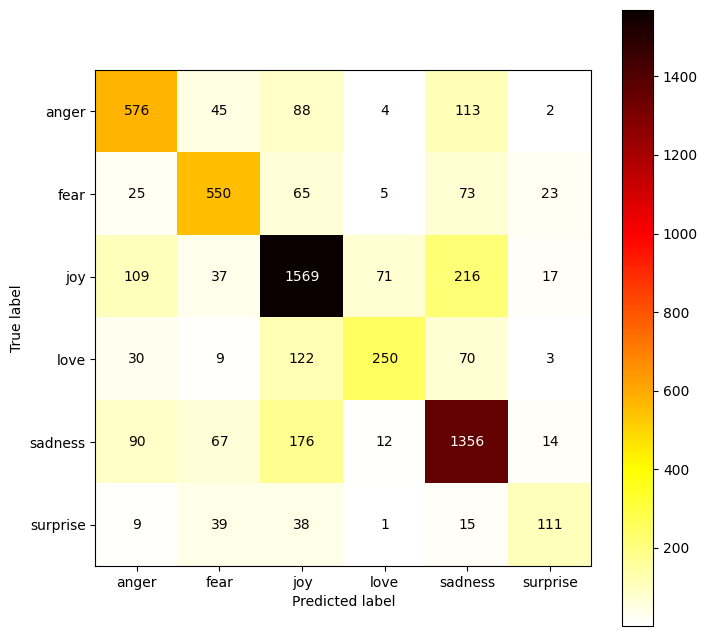

In [85]:
cm_display_rfc = ConfusionMatrixDisplay(rfc_cm, display_labels=rfc.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_rfc.plot(ax=ax,cmap='hot_r')

In [86]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
import xgboost as xgb

# Fit the encoder to your training target variable and transform it
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Fit and transform the training labels

# Transform your testing target variable using the same encoder
y_test_encoded = le.transform(y_test)

# Now you can train your XGBoost model
xgbc = xgb.XGBClassifier(max_depth=16, n_estimators=1000, nthread=6)
xgbc.fit(x_train, y_train_encoded)  # Train the model on encoded labels
y_pred_encoded = xgbc.predict(x_test)  # Predictions in encoded format

# Reverse transform predictions to original labels
y_pred = le.inverse_transform(y_pred_encoded)  # Decode predicted labels
y_test_original = le.inverse_transform(y_test_encoded)  # Decode true test labels

# Evaluation metrics
xgbc_acc = accuracy_score(y_test_original, y_pred)
xgbc_prec = precision_score(y_test_original, y_pred, average='macro')
xgbc_recal = recall_score(y_test_original, y_pred, average='macro')
xgbc_cm = confusion_matrix(y_test_original, y_pred)
xgbc_f1 = f1_score(y_test_original, y_pred, average='macro')

# Print metrics
print('Accuracy:', '{0:.3f}'.format(xgbc_acc * 100))
print('Precision:', '{0:.3f}'.format(xgbc_prec * 100))
print('Recall:', '{0:.3f}'.format(xgbc_recal * 100))
print('F1-score:', '{0:.3f}'.format(xgbc_f1 * 100))
print('\nClassification Report:\n', classification_report(y_test_original, y_pred))


Accuracy: 88.867
Precision: 85.623
Recall: 85.256
F1-score: 85.407

Classification Report:
               precision    recall  f1-score   support

       anger       0.90      0.85      0.88       828
        fear       0.87      0.83      0.85       741
         joy       0.90      0.93      0.91      2019
        love       0.79      0.79      0.79       484
     sadness       0.93      0.93      0.93      1715
    surprise       0.75      0.79      0.77       213

    accuracy                           0.89      6000
   macro avg       0.86      0.85      0.85      6000
weighted avg       0.89      0.89      0.89      6000



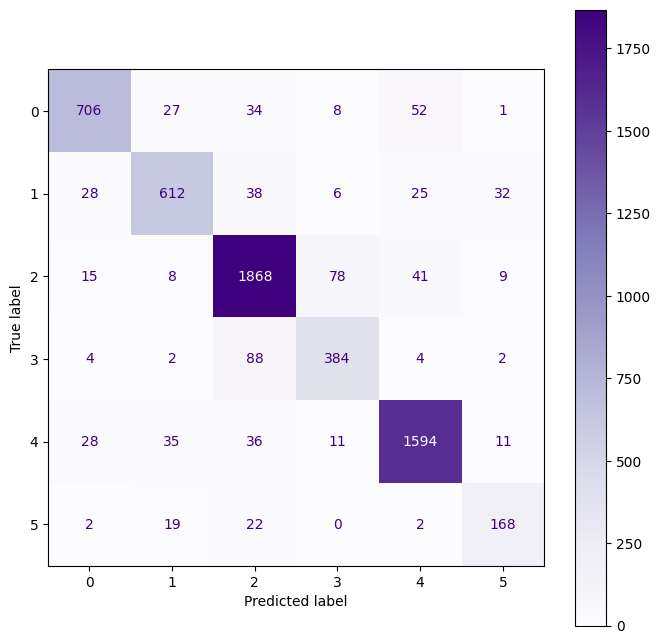

In [87]:
cm_display_xgbc = ConfusionMatrixDisplay(xgbc_cm, display_labels=xgbc.classes_)
_, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_xgbc.plot(ax=ax,cmap='Purples')

In [88]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)


dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_test, y_pred, average='macro')
dt_recal = recall_score(y_test, y_pred, average='macro')
dt_cm = confusion_matrix(y_test,y_pred)
dt_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(dt_acc*100))
print('Precision:', '{0:.3f}'.format(dt_prec*100))
print('Recall:', '{0:.3f}'.format(dt_recal*100))
print('F1-score:', '{0:.3f}'.format(dt_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 87.100
Precision: 83.385
Recall: 84.817
F1-score: 84.040
              precision    recall  f1-score   support

       anger       0.88      0.85      0.87       828
        fear       0.83      0.86      0.84       741
         joy       0.92      0.87      0.89      2019
        love       0.75      0.83      0.79       484
     sadness       0.89      0.91      0.90      1715
    surprise       0.74      0.77      0.75       213

    accuracy                           0.87      6000
   macro avg       0.83      0.85      0.84      6000
weighted avg       0.87      0.87      0.87      6000



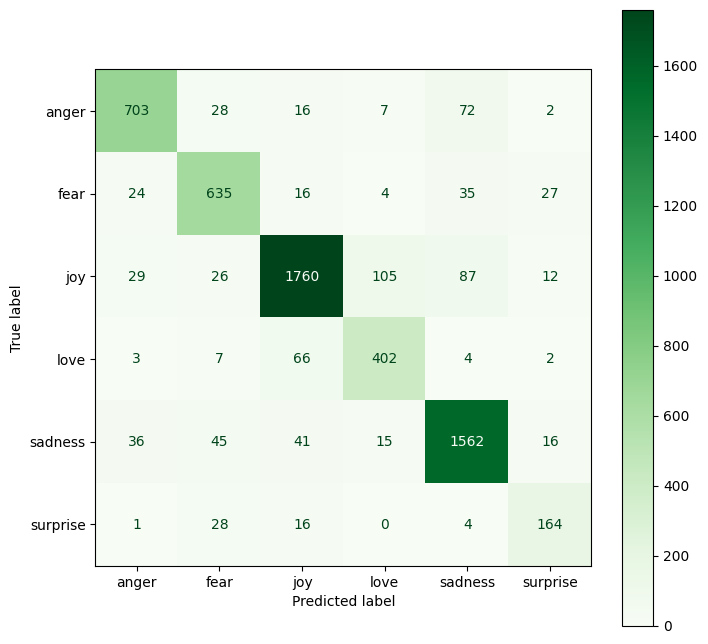

In [89]:
cm_display_dt = ConfusionMatrixDisplay(dt_cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_dt.plot(ax=ax,cmap='Greens')

In [90]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

y_pred = mnb.predict(x_test)

mnb_acc = accuracy_score(y_pred, y_test)
mnb_prec = precision_score(y_test, y_pred, average='macro')
mnb_recal = recall_score(y_test, y_pred, average='macro')
mnb_cm = confusion_matrix(y_test,y_pred)
mnb_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(mnb_acc*100))
print('Precision:', '{0:.3f}'.format(mnb_prec*100))
print('Recall:', '{0:.3f}'.format(mnb_recal*100))
print('F1-score:', '{0:.3f}'.format(mnb_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 67.633
Precision: 85.613
Recall: 43.058
F1-score: 43.576
              precision    recall  f1-score   support

       anger       0.95      0.34      0.50       828
        fear       0.88      0.26      0.40       741
         joy       0.63      0.97      0.77      2019
        love       1.00      0.07      0.13       484
     sadness       0.67      0.93      0.78      1715
    surprise       1.00      0.02      0.04       213

    accuracy                           0.68      6000
   macro avg       0.86      0.43      0.44      6000
weighted avg       0.76      0.68      0.61      6000



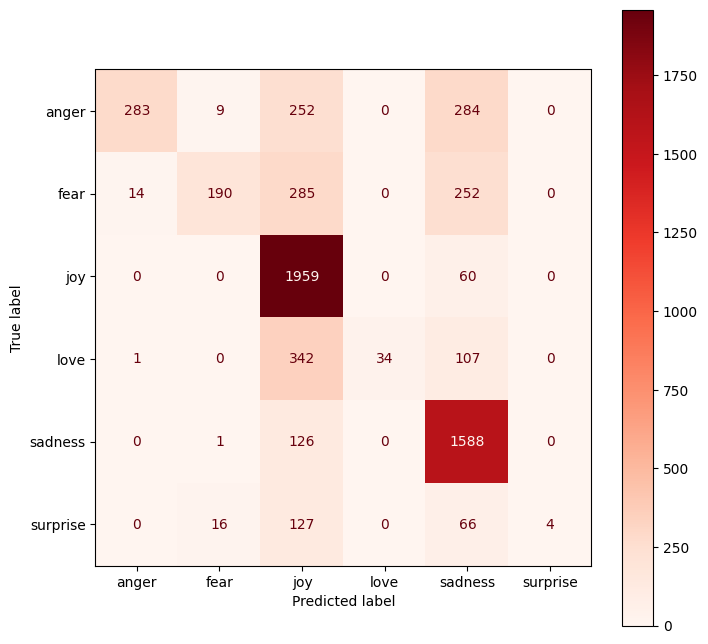

In [91]:
cm_display_mnb = ConfusionMatrixDisplay(mnb_cm, display_labels=mnb.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_mnb.plot(ax=ax,cmap='Reds')

In [92]:
def get_prec_recall_per_emotion(cm):
    per_emotion_precision = []
    for i in range(len(cm)):
        count_per_emotion,accurate = 0,0
        for j in range(len(cm)):
            if i == j:
                accurate = cm[j][i]
            count_per_emotion += cm[j][i]
        per_emotion_precision.append(round((accurate/count_per_emotion)*100,3))

    per_emotion_recall = []
    for i in range(len(cm)):
        count_per_emotion,accurate = 0,0
        for j in range(len(cm)):
            if i == j:
                accurate = cm[i][j]
            count_per_emotion += cm[i][j]
        per_emotion_recall.append(round((accurate/count_per_emotion)*100,3))

    return per_emotion_precision, per_emotion_recall

In [93]:
svm_per_prec,svm_per_recall = get_prec_recall_per_emotion(svm_cm)
lr_per_prec,lr_per_recall = get_prec_recall_per_emotion(lr_cm)
rfc_per_prec,rfc_per_recall = get_prec_recall_per_emotion(rfc_cm)
xgbc_per_prec,xgbc_per_recall = get_prec_recall_per_emotion(xgbc_cm)
mnb_per_prec,mnb_per_recall = get_prec_recall_per_emotion(mnb_cm)
dt_per_prec,dt_per_recall = get_prec_recall_per_emotion(dt_cm)

per_precision_list = pd.DataFrame({'Support vector Machine' : svm_per_prec,
                                'Logistic Regression' : lr_per_prec,
                                'Random Forest' : rfc_per_prec,
                                'XGBoost' : xgbc_per_prec,
                                'Naive Bayes' : mnb_per_prec,
                                'Decision Tree' : dt_per_prec},
                                index=svm.classes_)
per_precision_list

,Support vector Machine,Logistic Regression,Random Forest,XGBoost,Naive Bayes,Decision Tree
anger,90.434,90.691,68.653,90.166,94.966,88.317
fear,88.095,87.250,73.628,87.055,87.963,82.575
joy,89.019,82.456,76.239,89.549,63.378,91.906
love,84.259,86.517,72.886,78.850,100.000,75.422
sadness,91.577,88.403,73.576,92.782,67.374,88.549
surprise,87.578,92.437,65.294,75.336,100.000,73.543


In [94]:
per_recall_list = pd.DataFrame({'Support vector Machine' : svm_per_recall,
                                'Logistic Regression' : lr_per_recall,
                                'Random Forest' : rfc_per_recall,
                                'XGBoost' : xgbc_per_recall,
                                'Naive Bayes' : mnb_per_recall,
                                'Decision Tree' : dt_per_recall},
                                index=svm.classes_)
per_recall_list

,Support vector Machine,Logistic Regression,Random Forest,XGBoost,Naive Bayes,Decision Tree
anger,85.628,77.657,69.565,85.266,34.179,84.903
fear,84.885,76.653,74.224,82.591,25.641,85.695
joy,94.354,95.443,77.712,92.521,97.028,87.172
love,75.207,63.636,51.653,79.339,7.025,83.058
sadness,94.461,94.227,79.067,92.945,92.595,91.079
surprise,66.197,51.643,52.113,78.873,1.878,76.995


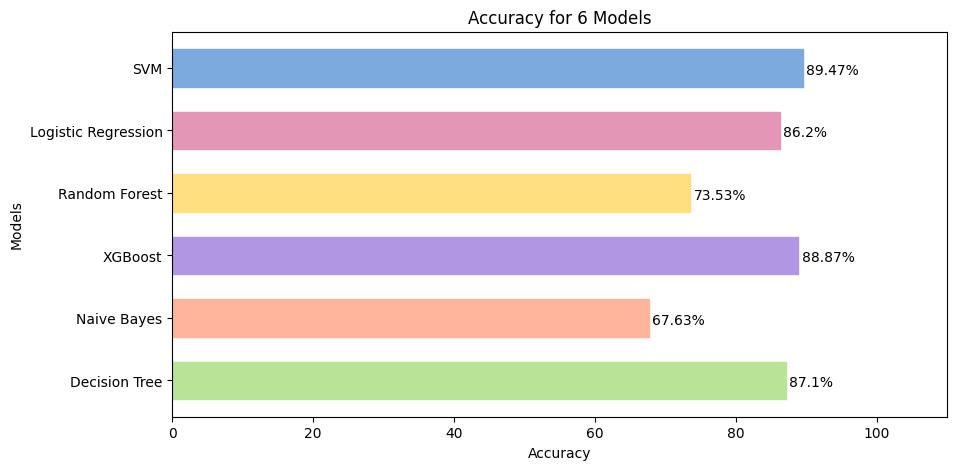

In [95]:
algorithms = ['SVM','Logistic Regression','Random Forest','XGBoost','Naive Bayes','Decision Tree']
algorithm_acc = [svm_acc*100, lr_acc*100, rfc_acc*100, xgbc_acc*100, mnb_acc*100, dt_acc*100]

algorithms = ['Decision Tree','Naive Bayes','XGBoost','Random Forest','Logistic Regression','SVM']
algorithm_acc = [dt_acc*100, mnb_acc*100, xgbc_acc*100, rfc_acc*100, lr_acc*100, svm_acc*100]
# Figure Size
fig = plt.figure(figsize =(10, 5))
bar_list = plt.barh(algorithms, algorithm_acc,height = 0.6,color='black')
bar_list[5].set_color('#7CAADE')
bar_list[4].set_color('#E396B6')
bar_list[3].set_color('#FFDF80')
bar_list[2].set_color('#B096E3')
bar_list[1].set_color('#FFB49C')
bar_list[0].set_color('#B9E396')
plt.xlabel('Accuracy',color='black')
plt.ylabel('Models',color='black')
plt.title('Accuracy for 6 Models')
plt.xlim(0,110)

for i, v in enumerate(algorithm_acc):
    plt.text(v + 0.5, i - 0.1, str(round(v,2))+'%', color='black',fontsize=10)

plt.show()

In [97]:
while True:
    input_str = input("What's in your mind: ")
    if input_str == 'nothing':
        break

    processed_text = tfidf_transformer_xtest.fit_transform(countVectorizer1.transform([input_str]))
    print('Emotion using SVM: ',end = '')
    print(svm.predict(processed_text))
    print('Emotion using Logistic Regression: ',end = '')
    print(logisticRegr.predict(processed_text))
    print('Emotion using Decision Tree: ',end = '')
    print(dt.predict(processed_text))
    print('Emotion using Naive Bayes: ',end = '')
    print(mnb.predict(processed_text))
    print('Emotion using XGBoost: ',end = '')
    print(le.inverse_transform(xgbc.predict(processed_text)))
    print('Emotion using Random Forest: ',end = '')
    print(rfc.predict(processed_text))

What's in your mind: my mood is melancholic
Emotion using SVM: ['joy']
Emotion using Logistic Regression: ['joy']
Emotion using Decision Tree: ['sadness']
Emotion using Naive Bayes: ['sadness']
Emotion using XGBoost: ['joy']
Emotion using Random Forest: ['sadness']
What's in your mind: i am sad today
Emotion using SVM: ['sadness']
Emotion using Logistic Regression: ['sadness']
Emotion using Decision Tree: ['sadness']
Emotion using Naive Bayes: ['sadness']
Emotion using XGBoost: ['sadness']
Emotion using Random Forest: ['sadness']
What's in your mind: nothing


In [98]:
# prompt: using the above models , generate ensemble learning model using majority voting and print evaluation metrics

from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Assuming you have your trained models: svm, logisticRegr, rfc, xgbc, dt, mnb
# and your test data: x_test, y_test

# Get predictions from all models
svm_pred = svm.predict(x_test)
lr_pred = logisticRegr.predict(x_test)
rfc_pred = rfc.predict(x_test)
xgbc_pred = le.inverse_transform(xgbc.predict(x_test))  # Ensure xgbc prediction is in the same format
dt_pred = dt.predict(x_test)
mnb_pred = mnb.predict(x_test)

# Ensemble using majority voting
ensemble_pred = []
for i in range(len(y_test)):
  votes = [svm_pred[i], lr_pred[i], rfc_pred[i], xgbc_pred[i], dt_pred[i], mnb_pred[i]]
  majority_vote = Counter(votes).most_common(1)[0][0]
  ensemble_pred.append(majority_vote)


# Evaluate the ensemble model
ensemble_acc = accuracy_score(y_test, ensemble_pred)
ensemble_prec = precision_score(y_test, ensemble_pred, average='macro')
ensemble_recal = recall_score(y_test, ensemble_pred, average='macro')
ensemble_f1 = f1_score(y_test, ensemble_pred, average='macro')

print('Ensemble Accuracy:', '{0:.3f}'.format(ensemble_acc*100))
print('Ensemble Precision:', '{0:.3f}'.format(ensemble_prec*100))
print('Ensemble Recall:', '{0:.3f}'.format(ensemble_recal*100))
print('Ensemble F1-score:', '{0:.3f}'.format(ensemble_f1*100))
print(classification_report(y_test, ensemble_pred))


Ensemble Accuracy: 89.200
Ensemble Precision: 88.497
Ensemble Recall: 82.961
Ensemble F1-score: 85.384
              precision    recall  f1-score   support

       anger       0.91      0.84      0.87       828
        fear       0.88      0.84      0.86       741
         joy       0.88      0.95      0.91      2019
        love       0.85      0.73      0.79       484
     sadness       0.91      0.95      0.93      1715
    surprise       0.87      0.68      0.76       213

    accuracy                           0.89      6000
   macro avg       0.88      0.83      0.85      6000
weighted avg       0.89      0.89      0.89      6000



In [100]:
import pickle

# Save all trained models and the ensemble voting logic
models = {
    'svm': svm,
    'logisticRegr': logisticRegr,
    'rfc': rfc,
    'xgbc': xgbc,
    'dt': dt,
    'mnb': mnb,
}

# Save the models and ensemble logic to a pickle file
with open('ensemble_model.pkl', 'wb') as f:
    pickle.dump(models, f)

print("Ensemble model saved as 'ensemble_model.pkl'")


Ensemble model saved as 'ensemble_model.pkl'
